Net(
  (fc1): Linear(in_features=1, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (tanh): Tanh()
)
[Parameter containing:
tensor([[ 0.6148],
        [-0.9000],
        [-0.1045],
        [ 0.7876],
        [-0.7999],
        [-0.5416],
        [ 0.6844],
        [ 0.5243]], requires_grad=True), Parameter containing:
tensor([ 0.8143,  0.8688,  0.7120, -0.1733,  0.0970, -0.0611, -0.5181, -0.1817],
       requires_grad=True), Parameter containing:
tensor([[ 0.0833, -0.1488,  0.1872,  0.0035,  0.0950,  0.0437,  0.2069,  0.2632],
        [ 0.0662,  0.3371,  0.0789, -0.2827, -0.2236, -0.2137,  0.3127, -0.2026],
        [-0.0697,  0.0465, -0.1426, -0.2982, -0.0047,  0.0222, -0.0215, -0.2410],
        [-0.1677, -0.0765,  0.0825,  0.0817, -0.0008, -0.0204, -0.0979, -0.0393],
        [ 0.1217, -0.0182, -0.1684,  0.1640, -0.1028, -0.2367,  0.0187, -0.1029],
        [ 0.3194, -0.3061

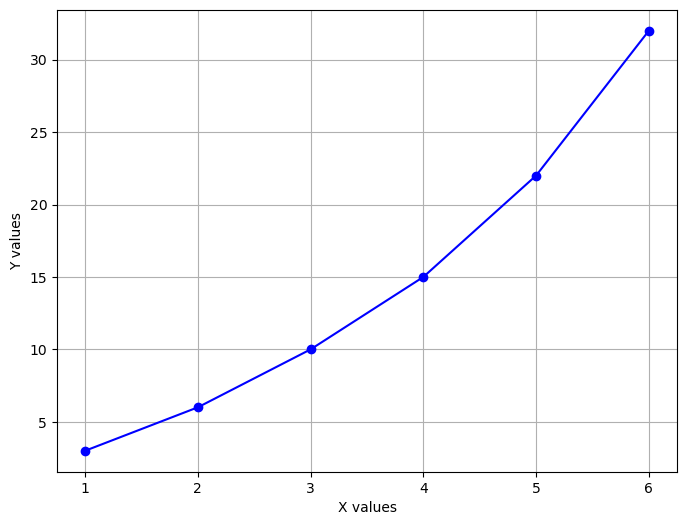

In [72]:
### Training with fancier version ###

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module): ## nn.Module class is used
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,8)  # in dim, out dim
        self.fc2 = nn.Linear(8,8)
        self.fc3 = nn.Linear(8,1)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
    def forward(self, x):
        #x = self.relu(self.fc1(x))     # ReLU mgith hide the information of negative value
        #x = self.relu(self.fc2(x))
        #x = self.fc3(x)
        #x = self.relu(self.fc3(x))
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.fc3(x)                 # The last layer should not apply any function so that the network can learn freely
        #x = self.relu(self.fc3(x))
        return x

net = Net()

print(net)
print(list(net.parameters())) # parameters are randomized


#def criterion(out, label):
#    return (label - out)**2
criterion = nn.MSELoss()


#optimizer = optim.SGD(net.parameters(), lr=1e-2)
optimizer = optim.Adam(net.parameters(), lr=1e-3)


data = [(1.0,3.0), (2.0,6.0), (3.0,10.0), (4.0,15.0), (5.0,22.0), (6.0,32.0)]

# Split data into x and y
x_values, y_values = zip(*data)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()

In [ ]:
for epoch in range(20000): # 0 - 19
    for i, current_data in enumerate(data):
        X, Y = current_data
        X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])
        optimizer.zero_grad()   
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()    ## This line is equivalent to "W = W - lr* W.grad"
    print("Epoch {} - loss: {}".format(epoch, loss))


### Test the trained network ###            
for i, current_data in enumerate(data):
    X, Y = current_data
    X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])  
    out = net(torch.FloatTensor(X))  
    print("when x = {}, y = {}".format(X, out))
    

Epoch 0 - loss: 1001.9894409179688
Epoch 1 - loss: 997.9114990234375
Epoch 2 - loss: 993.8309936523438
Epoch 3 - loss: 989.7747192382812
Epoch 4 - loss: 985.7474975585938
Epoch 5 - loss: 981.7423095703125
Epoch 6 - loss: 977.7469482421875
Epoch 7 - loss: 973.7510375976562
Epoch 8 - loss: 969.7495727539062
Epoch 9 - loss: 965.7404174804688
Epoch 10 - loss: 961.72314453125
Epoch 11 - loss: 957.6978149414062
Epoch 12 - loss: 953.6664428710938
Epoch 13 - loss: 949.6329956054688
Epoch 14 - loss: 945.6027221679688
Epoch 15 - loss: 941.5816040039062
Epoch 16 - loss: 937.5753173828125
Epoch 17 - loss: 933.5888061523438
Epoch 18 - loss: 929.6260986328125
Epoch 19 - loss: 925.6900024414062
Epoch 20 - loss: 921.7823486328125
Epoch 21 - loss: 917.9044189453125
Epoch 22 - loss: 914.0572509765625
Epoch 23 - loss: 910.241455078125
Epoch 24 - loss: 906.457763671875
Epoch 25 - loss: 902.7072143554688
Epoch 26 - loss: 898.9906616210938
Epoch 27 - loss: 895.3094482421875
Epoch 28 - loss: 891.665100097656

In [65]:
X

tensor([6.])

In [12]:
for epoch in range(20):
    print(epoch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [47]:
W = torch.tensor([1.0], requires_grad=True)
W = W*2
label = 1.0
loss = W*5 - label 
loss.backward()
#W.grad